### ПАРСИНГ

Чтобы проводить исследование, специалистам нужны данные. Где их взять?
Сайты - с оценками и мнением пользователей становятся значимымыми источниками информации для исследований самых разных объектов, в том числе и для формирования мнения относительно инфраструктуры городских территорий.  Переносить данные для анализа с сайта руками достаточно трудоемкий и бессмысленный процесс. Сбор данных с интернет-ресурса можно автоматизировать составив специальные программы - парсеры (https://habr.com/ru/company/click/blog/494020/). Задача это сложная. На предыдущем этапе вы уже познакомились с тегами страницы разметки. Пришло время самостоятельно освоить парсинг и извлекать информацию в упорядоченном виде с сайта.

Мы научимся искать информацию по тегам и аттрибутам, извлекать и преобразовывать в формат удобный для дальнейших преобразований.

В этом блоке задач вам потребуются знания базовых типов python, таких как `int, float, set, list, str, dict`, подробнее: https://smartiqa.ru/courses/python/lesson-2 

Давайте разбираться вместе!


Мы воспользуемся следующими библиотеками для парсинга и доступа к данным.

In [ ]:
!pip install bs4
!pip install requests

In [ ]:
from bs4 import BeautifulSoup # библиотека для парсинга - поиск информации по структуре тегов
import requests # получение данных по ссылке

Страница сайта написана на языке разметки html. По ссылке https://yupest.github.io/nti/site/ вы можете посмотреть как выглядит сайт для пользователей. В данном примере сайт представляет собой посты, которые содержат информацию: изображение, название локации, координаты, текстовое описание, количество лайков и посещаемость.

In [ ]:
html = requests.get('https://yupest.github.io/nti/site/').text

**Структура html**

Получить структуру html позволяет библиотека BeautifulSoup. Так вы сможете просмотреть вложенную структуру тегов, из которых необходимо извлекать информацию.  

In [ ]:
soup = BeautifulSoup(html, 'lxml')
soup

<!DOCTYPE html>
<html>
<head>
<title>Места района города Энск</title>
<meta charset="utf-8"/>
<link href="css/bootstrap.css" rel="stylesheet"/>
<link href="css/templatemo-misc.css" rel="stylesheet"/>
<link href="css/templatemo-style.css" rel="stylesheet"/>
<link href="http://fonts.googleapis.com/css?family=Roboto+Slab:400,700,300,100" rel="stylesheet"/>
<link href="http://fonts.googleapis.com/css?family=Roboto:400,400italic,300italic,300,500,500italic,700,900" rel="stylesheet"/>
</head>
<body>
<div class="col-md-4 project-item mix">
<div class="project-thumb">
<img alt="Набережная" src="images/project_1.jpg"/>
</div>
<div class="box-content project-detail">
<h2>Набережная у моста</h2>
<b>Координаты: </b><div class="coordinates"><span name="lattitude">26.1160</span><span>, </span><span name="longitude">-65.0363</span></div>
<div><span name="count_likes">25</span><span>❤️</span></div>
<div class="comments">
<b>Комментарии:</b>
<ul class="media-list">
<li class="media">
<div class="media-

**Теги html**

Они заключены в треугольные скобки `<>`, закрывающий тег выглядит как `</тег>`.

<img src = "https://user-images.githubusercontent.com/4215285/52063562-f140a580-2583-11e9-8b74-6f8d809971e9.jpeg" >

Нас интересует контент страницы, то есть информация, заключенная в тег `<body></body>`.

Ниже представлен список тегов, которые присутствуют на исследуемой странице.

In [ ]:
childrens = []
for child in soup.recursiveChildGenerator():
    if child.name:
        childrens.append(child.name)
list(set(childrens))

['p',
 'span',
 'link',
 'b',
 'div',
 'li',
 'meta',
 'html',
 'h2',
 'ul',
 'img',
 'head',
 'body',
 'title']

**Аттрибуты html**

Они присутствуют в тегах и имеют вид: 
* `class='class_name'`
* `name='name_name'`
* `id='id_name'`
* `style='style_name'`

Все что слева равно - это название аттрибута, справа - значение аттрибута.

<img src = 'https://seranking.ru/blog/wp-content/uploads/2019/05/html-элемент.png'></img>

**Работа с функцией .find_all()**

В переменной soup содержится структура html. Чтобы получить нужные данные, нужно обращаться по тегу и аттрибуту. Для этого воспользуемся функцией `find_all`

Сначала в функции указывается тег в кавычках, далее, если необходимо, через запятую в фигурных скобках - аттрибуты в виде: `{'название аттрибута':'значение аттрибута'}`

Так как функция `find_all` возвращает список тегов и то, что внутри них, нам нужно пройтись по каждому элементу этого списка и получить то, что нужно:

|Часть   | Код    |
|:-------|:-------|
| тег    |`.название_тега`|
| аттрибут | `['название аттрибута']`|
| соддержимое | `.text`|

Ниже будут представлены примеры использования функции

Для того, чтобы найти путь к информации, вернитесь на несколько ячеек выше и просмотрите значение `soup`.

**Названия локаций**

В теге, котором содержится название мест, отсутсвуют аттрибуты. Также этот тег является уникальным - то есть тег `h2` содержит только названия мест. Поэтому функции достаточно передать название тега. 

In [ ]:
locations = [r.text for r in soup.find_all('h2')]
locations

['Набережная у моста',
 'Динамо',
 'Вкус Искусства',
 'Набережная на пляже',
 'Имбирь',
 'Buono']

In [ ]:
categories = [r['alt'] for r in soup.find_all('img')]
categories

['Набережная', 'Парк', 'Кафе', 'Набережная', 'Кафе', 'Кафе']

**Отзывы**

In [ ]:
text = [r.text for r in soup.find_all('p', {'class':'review'})]
text

['Очень люблю эту набережную. Стараюсь каждый день гулять. Виды открываются прекрасные!',
 'Гулять прекрасно! А мне, как молодой маме, очень нравится, что есть лавочки. Обожаю дышать морским воздухом.',
 'Ничего особенного. Ну есть лавочки, так так и должно быть! Скучно.',
 'Парк супер! можно покормить белочек) Это наша местная достопримечательность.',
 'Тропинки размывает после дождя! невозможно пройти. А так все норм, есть лавочки, можно гулять.',
 'Мне нравится там гулять. Чисто и красиво',
 'Арт-кофейня приглашает окунуться в мир сюрреализма и поп-арта. Уникальный интерьер и оригинальные десерты позволят гостям стать частью картин знаменитых художников.',
 'Недавно открылось, не хватает пледов - сидеть на улице вечером холодно, пришлось в перейти в помещение.',
 'Остановок рядом нет! а так все хорошо.',
 'Так красиво! Хорошо, что мы здесь родились. все чисто, аккуратно сделано. Любимое место туристов и местных.',
 'Центр города! приятное место. Ходим сюда с друзьями, катаемся на ве

**Рейтинги отзывов**

Для того, чтобы получить целочисленный тип данных, нужно наши строковые значения поместить в функцию `int()`

In [ ]:
rating = [int(r.text) for r in soup.find_all('span', {'class':'rating'})]
rating

[5, 5, 3, 5, 3, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 4, 1]

**Лайки**

In [ ]:
likes = [int(r.text) for r in soup.find_all('span', {'name':'count_likes'})]
likes

[25, 18, 14, 50, 40, 10]

**Координаты**

Координаты представлены вещественным числовым типом. Поэтому для преобразования строки в этот тип, используем `float()`

In [ ]:
lattitudes = [float(r.text) for r in soup.find_all('span', {'name':'lattitude'})]
lattitudes

[26.116, 44.2137, 22.4313, 40.1789, 40.0444, 30.7513]

In [ ]:
longitudes = [float(r.text) for r in soup.find_all('span', {'name':'longitude'})]
longitudes

[-65.0363, -52.5705, -43.9601, 31.0728, -23.2252, 6.8338]

**Посещаемость**

Найдем значения посещаемостей. Она представлена в виде процента в стиле тега `div`. Но процент всегда разный, а других аттрибутов в этом теге нет. Поэтому мы не можем искать по этому тегу.

Поэтому найдем родительский тег, в котором заключен нужный нам тег. Он также `div`, но имеет класс `pipe line`. Посмотрим, что вернет нам поиск.

In [ ]:
[el for el in soup.find_all('div',{'class':'pipe line'})]

[<div class="pipe line">
 <div style="width: 30%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 38%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 35%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 28%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 70%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 90%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 75%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 33%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 30%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 40%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 45%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 60%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 80%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 64%"> </div>
 </div>, <div class="pipe line">
 <div style="width: 10%"> </div>
 </div>, <div clas

Следующим шагом, мы можем получить дочерний тег.

In [ ]:
[el.div for el in soup.find_all('div',{'class':'pipe line'})]

[<div style="width: 30%"> </div>,
 <div style="width: 38%"> </div>,
 <div style="width: 35%"> </div>,
 <div style="width: 28%"> </div>,
 <div style="width: 70%"> </div>,
 <div style="width: 90%"> </div>,
 <div style="width: 75%"> </div>,
 <div style="width: 33%"> </div>,
 <div style="width: 30%"> </div>,
 <div style="width: 40%"> </div>,
 <div style="width: 45%"> </div>,
 <div style="width: 60%"> </div>,
 <div style="width: 80%"> </div>,
 <div style="width: 64%"> </div>,
 <div style="width: 10%"> </div>,
 <div style="width: 9%"> </div>,
 <div style="width: 6%"> </div>,
 <div style="width: 10%"> </div>,
 <div style="width: 30%"> </div>,
 <div style="width: 60%"> </div>,
 <div style="width: 70%"> </div>,
 <div style="width: 80%"> </div>,
 <div style="width: 85%"> </div>,
 <div style="width: 90%"> </div>,
 <div style="width: 75%"> </div>,
 <div style="width: 50%"> </div>,
 <div style="width: 10%"> </div>,
 <div style="width: 15%"> </div>,
 <div style="width: 60%"> </div>,
 <div style="wid

Уже лучше! Для того, чтобы обратиться к значению интересующих нас аттрибутов, в квадратных скобках укажем этот аттрибут

In [ ]:
[el.div['style'] for el in soup.find_all('div',{'class':'pipe line'})]

['width: 30%',
 'width: 38%',
 'width: 35%',
 'width: 28%',
 'width: 70%',
 'width: 90%',
 'width: 75%',
 'width: 33%',
 'width: 30%',
 'width: 40%',
 'width: 45%',
 'width: 60%',
 'width: 80%',
 'width: 64%',
 'width: 10%',
 'width: 9%',
 'width: 6%',
 'width: 10%',
 'width: 30%',
 'width: 60%',
 'width: 70%',
 'width: 80%',
 'width: 85%',
 'width: 90%',
 'width: 75%',
 'width: 50%',
 'width: 10%',
 'width: 15%',
 'width: 60%',
 'width: 50%',
 'width: 80%',
 'width: 90%',
 'width: 40%',
 'width: 20%',
 'width: 15%',
 'width: 50%',
 'width: 15%',
 'width: 10%',
 'width: 20%',
 'width: 75%',
 'width: 85%',
 'width: 45%']

И получим численные значения, чтобы с ними можно было производить вычисления. Для этого, получим числа. Строка состоит из элементов - символов, например нулевой элемент строки `width: 38%` - это `w`. Чтобы получить срез элементов, например, символы строки с 7 элемента, нужно в квадратных скобках после строки указать номер элемента и символ среза ":", то есть : `'width: 38%'[7:]`, тогда результатом такой операции станет `'38%'`.
Чтобы убрать последний символ процента, нужно в срезе указать номер с конца - то есть `-1` и поставить это значение после двоеточия, что обозначает "все элементы до последнего символа":
`'width: 38%'[7:][:-1]`
В результате мы получим числа.

In [ ]:
[el.div['style'][7:][:-1] for el in soup.find_all('div',{'class':'pipe line'})]

['30',
 '38',
 '35',
 '28',
 '70',
 '90',
 '75',
 '33',
 '30',
 '40',
 '45',
 '60',
 '80',
 '64',
 '10',
 '9',
 '6',
 '10',
 '30',
 '60',
 '70',
 '80',
 '85',
 '90',
 '75',
 '50',
 '10',
 '15',
 '60',
 '50',
 '80',
 '90',
 '40',
 '20',
 '15',
 '50',
 '15',
 '10',
 '20',
 '75',
 '85',
 '45']

Однако, как вы можете наблюдать значения до сих пор являются типом строки. Нам нужно преобразовать в целочисленный тип. Для этого воспользуемся преобразованием `int()` и в скобках укажем наше значение строки.

In [ ]:
[int(el.div['style'][7:][:-1]) for el in soup.find_all('div',{'class':'pipe line'})]

[30,
 38,
 35,
 28,
 70,
 90,
 75,
 33,
 30,
 40,
 45,
 60,
 80,
 64,
 10,
 9,
 6,
 10,
 30,
 60,
 70,
 80,
 85,
 90,
 75,
 50,
 10,
 15,
 60,
 50,
 80,
 90,
 40,
 20,
 15,
 50,
 15,
 10,
 20,
 75,
 85,
 45]

Присвоим эти значения переменной `density`

In [ ]:
density = [int(el.div['style'][7:-1]) for el in soup.find_all('div',{'class':'pipe line'})]

### ПОСТРОЕНИЕ ДИАГРАММ

**Средняя посещаемость места**

In [ ]:
density

[30,
 38,
 35,
 28,
 70,
 90,
 75,
 33,
 30,
 40,
 45,
 60,
 80,
 64,
 10,
 9,
 6,
 10,
 30,
 60,
 70,
 80,
 85,
 90,
 75,
 50,
 10,
 15,
 60,
 50,
 80,
 90,
 40,
 20,
 15,
 50,
 15,
 10,
 20,
 75,
 85,
 45]

In [ ]:
for i in range(0, len(density), 7):
  print(i)

0
7
14
21
28
35


In [ ]:
# Каждая локация содержит значения посещаемостей по каждому дню недели, а их у нас 7.
# чтобы найти среднее значение посещаемости по 1 локации, нужно проссумировать значения 7 дней и разделить на их количество (7).
density_list = []
for i in range(0, len(density), 7):
#     функция .append добавляет значение в список density_list
    density_list.append(int(sum(density[i:i+7])/7))

In [ ]:
density_list

[52, 50, 27, 57, 50, 42]

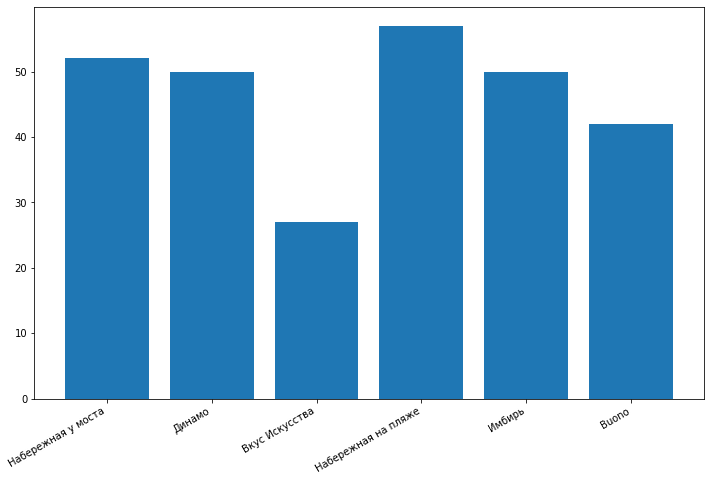

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[12, 8])
plt.bar(locations, density_list)
plt.gcf().autofmt_xdate()

### СЕМАНТИЧЕСКИЙ АНАЛИЗ

Нужно разделить отзывы на позитивные и негативные по значению рейтинга (rating)

In [ ]:
rating

[5, 5, 3, 5, 3, 5, 5, 4, 3, 5, 5, 5, 5, 5, 5, 5, 4, 1]

In [ ]:
text

['Очень люблю эту набережную. Стараюсь каждый день гулять. Виды открываются прекрасные!',
 'Гулять прекрасно! А мне, как молодой маме, очень нравится, что есть лавочки. Обожаю дышать морским воздухом.',
 'Ничего особенного. Ну есть лавочки, так так и должно быть! Скучно.',
 'Парк супер! можно покормить белочек) Это наша местная достопримечательность.',
 'Тропинки размывает после дождя! невозможно пройти. А так все норм, есть лавочки, можно гулять.',
 'Мне нравится там гулять. Чисто и красиво',
 'Арт-кофейня приглашает окунуться в мир сюрреализма и поп-арта. Уникальный интерьер и оригинальные десерты позволят гостям стать частью картин знаменитых художников.',
 'Недавно открылось, не хватает пледов - сидеть на улице вечером холодно, пришлось в перейти в помещение.',
 'Остановок рядом нет! а так все хорошо.',
 'Так красиво! Хорошо, что мы здесь родились. все чисто, аккуратно сделано. Любимое место туристов и местных.',
 'Центр города! приятное место. Ходим сюда с друзьями, катаемся на ве

In [ ]:
negative = []
positive = []
for i in range(0, len(rating)):
    if rating[i]<4:
        negative.append(text[i])
    else:
        positive.append(text[i])

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

#Выделяем слова которые точно не должны использоваться при построении облака слов!
stopwords = set(STOPWORDS)
stopwords.update(["на", "все", "эта", "не", "уже", "это", "что", "по", "так", "но", 'какой', "очень"])

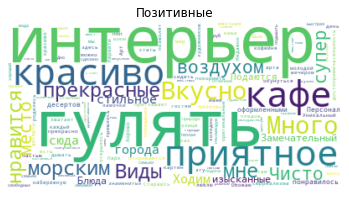

In [ ]:
#Создаем облако
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(str(positive))

# Рисуем результат
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Позитивные')
plt.axis("off")
plt.show()

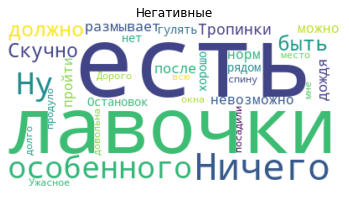

In [ ]:
#Создаем облако
wordcloud = WordCloud(stopwords = stopwords, background_color="white").generate(str(negative))

# Рисуем результат
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Негативные')
plt.axis("off")
plt.show()

### КАРТЫ

**Координаты**

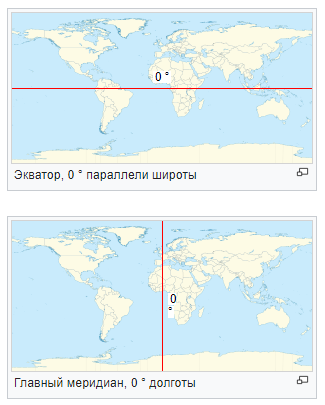

In [ ]:
!pip install folium

In [ ]:
import folium # библиотека для работы с картами

Маркеры на карте:

<img src = 'https://media.proglib.io/wp-uploads/-000//1/5c3dea82bc8aa_1*PQTL04ASzSvHv04uku2UFg.png'></img>

Возможные цвета маркеров folium

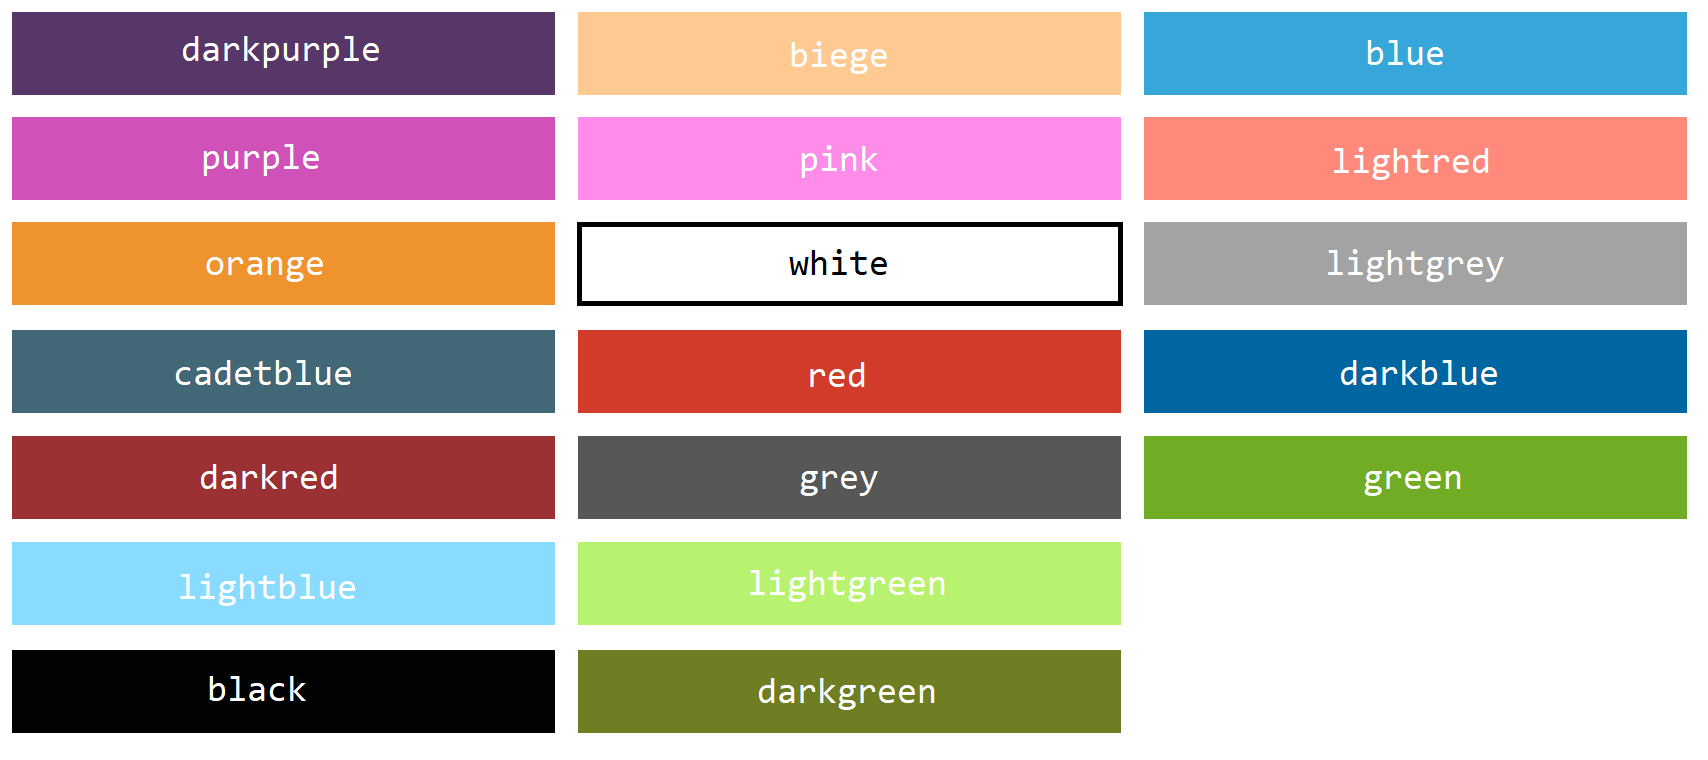

In [ ]:
# возможные цвета маркеров или точек
# чтобы использовать нужные вам цвета, перенесите их в начало списка
colors = [ 'purple', 'orange', 'cadetblue', 'darkred', 'lightblue',  'beige', 'pink', 'white', 'red', 
          'gray', 'lightgreen', 'darkgreen', 'blue', 'lightred', 'lightgray', 'darkpurple','darkblue','black', 'green']

**Карта по категориям - цвету**

In [ ]:
set(categories), len(set(categories))

({'Кафе', 'Набережная', 'Парк'}, 3)

In [ ]:
#создаем карту
m = folium.Map([37, 0], zoom_start=2, tiles='') #начальные координаты, начальное приближение, название подложки
# если карта - это изображение, то tiles = ''

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://i.imgur.com/ihkiDBj.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 0.6, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
)
# добавить изображение в карту
img.add_to(m)

# цикл для каждого места по координатам, категориям и названиям места
for lat, lon, cat, name in zip(lattitudes, longitudes, categories, locations):
    
#     задаем цвет в соответствии с категорией
    color = 'orange'
    if cat == 'Парк':
        color = 'green'
    elif cat == 'Набережная':
        color = 'blue'
        
#     создание маркера     
    folium.Marker(
        location=[lat, lon], # координаты широты и долготы
        popup = (cat+'\n'+name).encode('raw_unicode_escape').decode('utf-8'),  #чтобы поддерживалась кириллица
        icon=folium.Icon(color = color)
    ).add_to(m)

m

**Карта со своими иконками**
 
Сайт для загрузки иконок: https://imgbb.com/ 

Для работы со своей иконкой нужна ссылка на нее. Поэтому мы воспользуемся бесплатным хостингом картинок.

In [ ]:
#создаем карту
m = folium.Map([37, 0], zoom_start=2, tiles='')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://i.imgur.com/ihkiDBj.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 0.4, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
)
# добавить изображение в карту
img.add_to(m)

for lat, lon, name, cat in zip(lattitudes, longitudes, locations, categories):
    
    color = 'https://i.ibb.co/zV1748j/image.png'
    if cat == 'Парк':
        color = 'https://i.ibb.co/BP8Hpzk/image.png'
    elif cat == 'Набережная':
        color = 'https://i.ibb.co/vLbkq6c/image.png'

    icon = folium.features.CustomIcon(color, icon_size=(50, 50)) 
#     создание маркера     
    folium.Marker(
        location=[lat, lon], # координаты широты и долготы
        popup = cat.encode('raw_unicode_escape').decode('utf-8'),  #чтобы поддерживалась кириллица
        icon=icon
    ).add_to(m)

m

**Необязательный блок: нормирование данных**

Количество лайков у мест могут сильно различаться. Из-за этого, если размером мы хотим показать значение лайка, некоторые иконки могут оказаться маленькими, не просматриваемыми. Для этого нужно перевести значения лайков в другую шкалу по формуле:


<img src = 'https://reshit.ru/Servisi_dlya_uchashihsya/formuly/img//formula_((xminusx_min)_(x_max%20minus%20x_min))umnozhit(maxminusmin)plusmin.png'>

где: 
- $x$ - значение из выборки,
- $x_{min}$ - минимальное значение из выборки
- $x_{max}$ - максимальное значение из выборки
- $max$ - максимальная граница новой шкалы
- $min$ - минимальная граница новой шкалы

**Карта по лайкам - размеру**

In [ ]:
likes

[25, 18, 14, 50, 40, 10]

In [ ]:
#создаем карту
m = folium.Map([37, 0], zoom_start=2, tiles='')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://i.imgur.com/ihkiDBj.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 1, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
)
# добавить изображение в карту
img.add_to(m)

for lat, lon, name, like, cat in zip(lattitudes, longitudes, locations, likes, categories):
    
    color = 'https://i.ibb.co/zV1748j/image.png'
    if cat == 'Парк':
        color = 'https://i.ibb.co/BP8Hpzk/image.png'
    elif cat == 'Набережная':
        color = 'https://i.ibb.co/vLbkq6c/image.png'

# нормировка данных - переводим количество лайков в нужный нам интервал (от 25 до 50) для красивого отображения иконок
    size = (like-min(likes))/(max(likes)-min(likes))*30+30

    icon = folium.features.CustomIcon(
        color, # ссылка на иконку с нужным цветом
        # icon_size = (like, like)
        icon_size=(size, size)
        ) # размер иконки

# создание маркера     
    folium.Marker(
        location=[lat, lon], # координаты широты и долготы
        popup = (cat+'\n'+str(like)).encode('raw_unicode_escape').decode('utf-8'),  #чтобы поддерживалась кириллица
        icon=icon
    ).add_to(m)

m

In [ ]:
#создаем карту
m = folium.Map([37, 0], zoom_start=2, tiles='')

img = folium.raster_layers.ImageOverlay(
    name='Mercator projection SW', # название слоя
    image='https://i.imgur.com/ihkiDBj.jpg', #ссылка на изображение карты
    bounds=[[-90, -180], [90, 180]], #обязательный параметр: наложение по координатам, границы слоя
    opacity = 0.4, # прозрачность карты, где 1 - непрозрачно, а 0 - прозрачно, 0.5 - половина прозрачности
)
# добавить изображение в карту
img.add_to(m)

for lat, lon, name, like, cat in zip(lattitudes, longitudes, locations, likes, categories):
    
    color = 'orange'
    if cat == 'Парк':
        color = 'green'
    elif cat == 'Набережная':
        color = 'blue'
        
    folium.CircleMarker(
        location=[lat, lon], 
        radius = like/2, 
        popup=name.encode('raw_unicode_escape').decode('utf-8'), 
        fill_color=color, 
        color = None,
        fill_opacity = 0.8
    ).add_to(m)

m

**Карта реальных городов**

In [ ]:
lattitudes = [59.94046820000001,  59.9257475,  59.91957610000001,  59.9154289,  59.974068599999995,  59.982425899999996,  60.0523313,  59.9500019,  59.92963510000001,  59.90094200000001,  59.9440512,  59.8327547,  59.966304099999995,  59.87096510000001,  59.94405089999999,  59.9385542,  59.940003299999994,  59.9255208,  59.9522125,  59.937574,  59.9574431,  59.9307966,  59.9309446,  59.9129488,  59.9227369,  59.937633999999996,  59.9501834,  59.93438929999999,  59.931223100000004,  59.94942370000001,  59.939391799999996,  59.97960989999999,  59.8919225,  59.983522,  59.887196499999995,  59.9691566,  59.94805699999999,  59.970812699999996,  59.941936399999996,  59.8918515,  59.937321499999996,  59.9370483,  59.94214010000001,  59.93525379999999,  59.93625600000001,  59.9459202,  59.938003099999996,  59.9405826,  59.9410454,  59.94141,  59.9387762,  59.942409899999994,  59.9380399,  59.937822,  59.9372574,  59.9387782,  59.94357120000001,  59.941582999999994,  59.9419926,  59.93644980000001,  59.9405211,  59.9389877,  59.9413522,  59.9408596,  59.94168440000001,  59.940718999999994,  59.9371998,  59.9434635,  59.9349167,  59.94493789999999,  59.9342196,  59.9398135,  59.9422855,  59.94443979999999,  59.94547829999999,  59.9444091,  59.93510500000001,  59.940368799999995,  59.936378299999994,  59.938514,  59.937495999999996,  59.940302,  59.93703960000001,  59.935879799999995,  59.943792,  59.946388899999995,  59.93765300000001,  59.93995870000001,  59.939808400000004,  59.9390414,  59.9434769,  59.943100199999996,  59.943792,  59.9438301,  59.938404799999994,  59.9387997,  59.9442127,  59.9360714,  59.9349907,  59.93934870000001]
longitudes = [30.30054160000001,  30.3959793,  30.3354331,  30.409394399999996,  30.2975903,  30.4192315,  30.34694390000001,  30.316671799999998,  30.2889071,  30.273809999999997,  30.3318224,  30.231732899999997,  30.34315800000001,  30.4408318,  30.306524100000004,  30.32604000000001,  30.332736699999998,  30.332295799999997,  30.292437300000003,  30.35009010000001,  30.324210600000004,  30.350673699999998,  30.350852000000003,  30.319622100000004,  30.35764600000001,  30.368089500000004,  30.366667699999997,  30.2569964,  30.3766848,  30.386890700000002,  30.22079260000001,  30.256386699999997,  30.274075,  30.2651749,  30.318630100000004,  30.397670299999998,  30.415805300000002,  30.414539899999998,  30.4614353,  30.1982858,  30.327161,  30.328628600000002,  30.338299199999998,  30.3242062,  30.321066,  30.3298523,  30.317212800000004,  30.3412748,  30.3261015,  30.326247,  30.326086100000005,  30.327313699999998,  30.325453800000002,  30.325665700000002,  30.33137270000001,  30.3231967,  30.3317939,  30.3358786,  30.321300300000004,  30.3241016,  30.3376837,  30.3376808,  30.3198114,  30.3195869,  30.3380109,  30.32453030000001,  30.33161710000001,  30.3365424,  30.324948499999998,  30.335488,  30.3207845,  30.3356526,  30.336662899999997,  30.3287485,  30.329848300000002,  30.3354798,  30.325174699999998,  30.300058899999996,  30.3022305,  30.307517100000002,  30.3086683,  30.289064,  30.2909168,  30.3053598,  30.3055876,  30.303333399999996,  30.311645000000002,  30.2992821,  30.299295899999997,  30.298558,  30.304590899999997,  30.3068685,  30.3055876,  30.305693800000004,  30.292816600000002,  30.292070199999998,  30.3074789,  30.307454600000003,  30.2969956,  30.289098100000004]
categories = ['Достопримечательность',  'Мост',  'Сад',  'Мост',  'Сад',  'Парк',  'Сад',  'Достопримечательность',  'Парк',  'Достопримечательность',  'Парк',  'Парк',  'Парк',  'Парк',  'Сквер',  'Парк',  'Сад',  'Сквер',  'Сквер',  'Сад',  'Парк',  'Сквер',  'Сад',  'Сад',  'Сад',  'Сад',  'Набережная',  'Сад',  'Сад',  'Сквер',  'Сквер',  'Парк',  'Парк',  'Сквер',  'Сад',  'Сад',  'Сквер',  'Парк',  'Парк',  'Парк',  'Мост',  'Достопримечательность',  'Мост',  'Памятник',  'Достопримечательность',  'Памятник',  'Памятник',  'Достопримечательность',  'Площадь',  'Памятник',  'Достопримечательность',  'Достопримечательность',  'Достопримечательность',  'Памятник',  'Сквер',  'Достопримечательность',  'Памятник',  'Достопримечательность',  'Памятник',  'Достопримечательность',  'Памятник',  'Сквер',  'Достопримечательность',  'Мост',  'Достопримечательность',  'Улица',  'Площадь',  'Аллея',  'Парк',  'Сад',  'Сад',  'Остров',  'Водоем',  'Остров',  'Остров',  'Сад',  'Сквер',  'Памятник',  'Сад',  'Достопримечательность',  'Памятник',  'Достопримечательность',  'Достопримечательность',  'Сад',  'Памятник',  'Мост',  'Памятник',  'Достопримечательность',  'Достопримечательность',  'Достопримечательность',  'Памятник',  'Памятник',  'Достопримечательность',  'Достопримечательность',  'Сад',  'Сад',  'Достопримечательность',  'Памятник',  'Памятник',  'Памятник']

tiles:
- "OpenStreetMap"
- "Stamen Terrain" 
- "Stamen Toner"
- "Stamen Watercolor"
- "CartoDB positron"
- "CartoDB dark_matter"

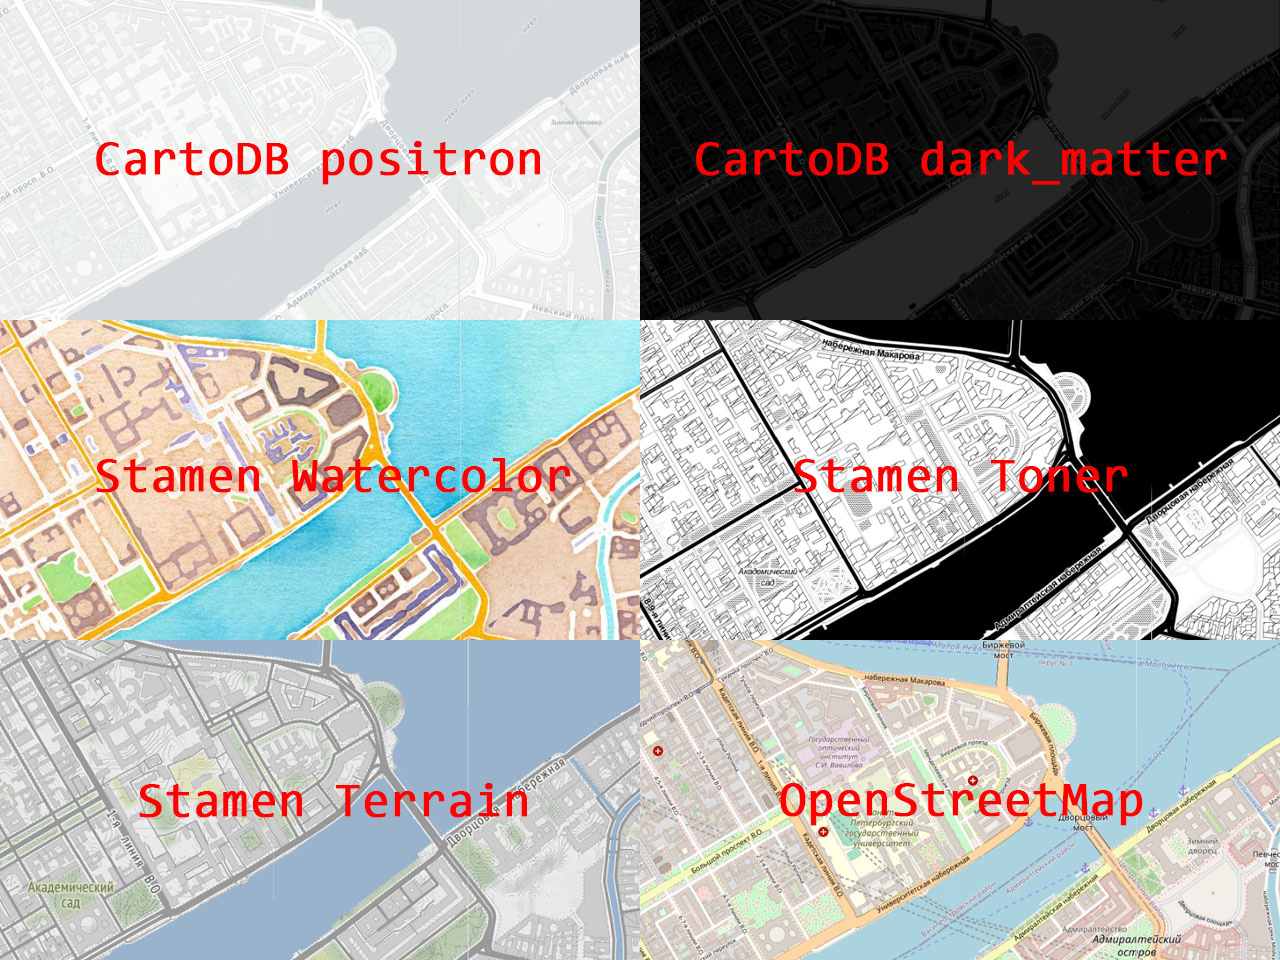

In [ ]:
# функция, которая возвращает словарь (тип ключ-значение), то есть получаем возможность получить цвет, по каегории 
# dict_colors['Парк'] = 'purple'
def set_colors(categories):
    dict_colors = {}
    for i in range(0, len(set(categories))):
        dict_colors[list(set(categories))[i]] = colors[i] 
    return dict_colors

In [ ]:
list(set(categories))

['Сквер',
 'Памятник',
 'Парк',
 'Сад',
 'Мост',
 'Водоем',
 'Площадь',
 'Аллея',
 'Достопримечательность',
 'Остров',
 'Набережная',
 'Улица']

In [ ]:
list(set(categories))[1], colors[1]

('Памятник', 'orange')

In [ ]:
dict_colors = set_colors(categories)

map = folium.Map([lattitudes[0],longitudes[0]], zoom_start=10, tiles = 'CartoDB positron')

for lat, lon, cat in zip(lattitudes, longitudes, categories):
    
    folium.CircleMarker(
        location=[lat, lon], 
        radius = 6, 
        popup=cat.encode('raw_unicode_escape').decode('utf-8'), 
        fill_color=dict_colors[cat], 
        color = None, 
        fill_opacity = 0.8
    ).add_to(map)

map